# SGD

In [81]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split

In [82]:
X = load_boston().data
Y = load_boston().target

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [84]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
train_data = pd.DataFrame(X_train)
train_data['price'] = y_train

train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.896249,-0.510601,0.982782,-0.288214,0.480831,-0.197767,0.994612,-0.743428,1.677124,1.546715,0.864421,0.240404,0.771556,14.6
1,-0.348959,-0.510601,-0.448676,-0.288214,-0.165927,-0.714681,0.765306,0.429409,-0.633565,-0.614988,1.221187,0.208528,0.322490,16.6
2,-0.417641,0.034130,-0.487480,-0.288214,-0.285067,-0.215832,0.973115,1.021782,-0.518031,-0.590902,-1.365367,0.434820,0.927753,27.1
3,-0.421968,-0.510601,2.368249,-0.288214,0.438282,-0.478457,0.521668,-0.771727,-0.633565,1.817680,0.819825,0.434820,0.118876,20.1
4,-0.419793,-0.510601,-0.388313,-0.288214,-0.319107,0.203813,1.008944,-0.620890,-0.518031,-0.151336,1.176591,0.416056,-0.031743,19.8


## Sklearn implementation of SGD

In [86]:
clf = SGDRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

22.8672983197592


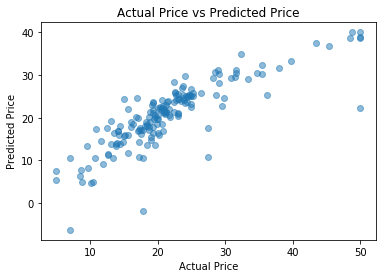

In [87]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Custom implementation of SGD

In [167]:
def SGD (train_data, r, n_itr): #random value for r and k
         
    w = np.zeros(shape=(1,train_data.shape[1]-1)) #initialize vector w
    b = 0 #initialize b
    itr = 1
    k=10
    
    while(itr <= n_itr): 
        w_old = w
        b_old = b
         
        w_init = np.zeros(shape=(1,train_data.shape[1]-1))
        b_init = 0
         
        data = train_data.sample(k) #random k points
        
        x = np.array(data.drop('price',axis=1)) 
        y = np.array(data['price'])
                
        for i in range(k):
            w_init += x[i] * (y[i] - (np.dot(w_old, x[i]) + b_old)) * (-2/k)
            b_init += (y[i] - (np.dot(w_old, x[i]) + b_old)) * (-2/k)
        
        w = w_old - r * w_init
        b = b_old - r * b_init
         
        while (w_old != w).all():
            break

        itr = itr +  1
        
    return w, b #optimal w and b

In [176]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y = np.dot(w, x[i]) + b
        y_pred.append(np.asscalar(y))
    return np.array(y_pred)

In [177]:
w, b = SGD(train_data, r=0.01, n_itr=1000)
y_pred = predict(X_test, w, b)
print(mean_squared_error(y_test, y_pred))

21.487208251387955


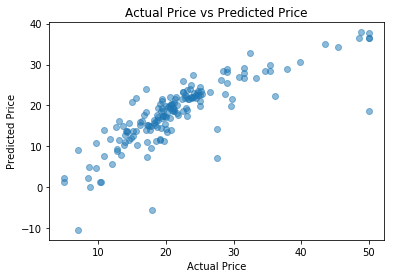

In [149]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [150]:
x = PrettyTable()

x.field_names = ["Model", "Implementation", "MSE"]

x.add_row(["Linear Regression", "SGDRegressor from sklearn", 23.17])
x.add_row(["Linear Regression", "Custom Method", 20.79])

print(x)

+-------------------+---------------------------+-------+
|       Model       |       Implementation      |  MSE  |
+-------------------+---------------------------+-------+
| Linear Regression | SGDRegressor from sklearn | 23.17 |
| Linear Regression |       Custom Method       | 20.79 |
+-------------------+---------------------------+-------+


### Conclusions

- There is not much difference in the mean squared error in both the approaches
- Selecting best learning_rate can make the model perform better
- Selecting number of iterations also affect the model performance